In [168]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Load dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/extracted_dataset",
    image_size=(64, 64),
    label_mode="binary"
)

# Split into training and testing datasets
train_data = dataset.take(8)
test_data = dataset.skip(8)
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Preprocess layer to rescale pixel values
preprocess = tf.keras.layers.Rescaling(1./255)

# Build the model
model = Sequential([
    Input((64, 64, 3)),
    Flatten(),
    preprocess,
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

# Train the model
model.fit(train_data,
          epochs=30,
          batch_size=32,
          verbose=1,
          validation_data=test_data)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test Accuracy: {test_accuracy:.2f}')

Found 269 files belonging to 2 classes.
Epoch 1/30
8/8 [==============================] - 2s 46ms/step - loss: 2.1160 - accuracy: 0.5117 - val_loss: 0.8160 - val_accuracy: 0.5385
Epoch 2/30
8/8 [==============================] - 0s 6ms/step - loss: 0.7955 - accuracy: 0.5820 - val_loss: 0.9092 - val_accuracy: 0.5385
Epoch 3/30
8/8 [==============================] - 0s 6ms/step - loss: 0.7057 - accuracy: 0.5664 - val_loss: 0.7133 - val_accuracy: 0.5385
Epoch 4/30
8/8 [==============================] - 0s 9ms/step - loss: 0.6183 - accuracy: 0.6719 - val_loss: 0.5873 - val_accuracy: 0.6154
Epoch 5/30
8/8 [==============================] - 0s 6ms/step - loss: 0.5624 - accuracy: 0.7383 - val_loss: 0.4834 - val_accuracy: 0.7692
Epoch 6/30
8/8 [==============================] - 0s 5ms/step - loss: 0.5282 - accuracy: 0.7422 - val_loss: 0.3965 - val_accuracy: 0.8462
Epoch 7/30
8/8 [==============================] - 0s 6ms/step - loss: 0.4966 - accuracy: 0.7656 - val_loss: 0.3463 - val_accuracy: 

1/1 [==============================] - 0s 18ms/step


<ipython-input-170-7941d751736a>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = int(predictions[i] > 0.5)
<ipython-input-170-7941d751736a>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = int(predictions[idx] > 0.5)


Prediction: 1, Prediction Value: 0.9763022661209106, Actual: [1.]
Prediction: 1, Prediction Value: 0.9839816689491272, Actual: [1.]
Prediction: 0, Prediction Value: 0.01835791952908039, Actual: [0.]
Prediction: 1, Prediction Value: 0.973666250705719, Actual: [1.]
Prediction: 0, Prediction Value: 0.05749445781111717, Actual: [0.]
Prediction: 0, Prediction Value: 0.007003424223512411, Actual: [0.]
Prediction: 0, Prediction Value: 0.05750318616628647, Actual: [0.]
Prediction: 0, Prediction Value: 0.22898945212364197, Actual: [0.]
Prediction: 0, Prediction Value: 0.15305167436599731, Actual: [0.]
Prediction: 0, Prediction Value: 0.08611747622489929, Actual: [0.]


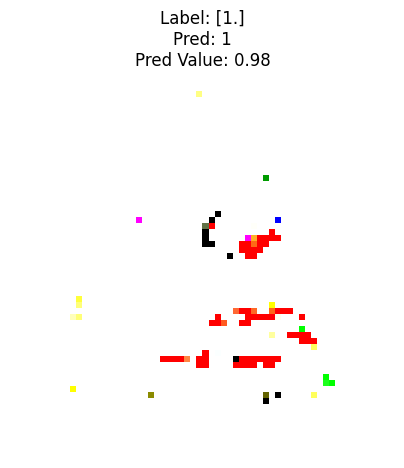

In [170]:
# Extract images and labels from the test dataset
test_images = []
test_labels = []
for images, labels in test_data.take(-1):
    test_images.append(images.numpy())
    test_labels.append(labels.numpy())

test_images = np.concatenate(test_images)
test_labels = np.concatenate(test_labels)

# Make predictions on the test data
predictions = model.predict(test_images)

# Print predictions and labels for debugging
for i in range(10):  # Print first 10 predictions
    predicted_label = int(predictions[i] > 0.5)
    print(f'Prediction: {predicted_label}, Prediction Value: {predictions[i][0]}, Actual: {test_labels[i]}')

# Function to plot one random image with its predicted label
def plot_one_random_image_with_prediction(images, labels, predictions):
    idx = np.random.choice(len(images), 1)[0]
    predicted_label = int(predictions[idx] > 0.5)
    plt.figure(figsize=(5, 5))
    plt.imshow(images[idx])
    plt.title(f'Label: {labels[idx]}\nPred: {predicted_label}\nPred Value: {predictions[idx][0]:.2f}')
    plt.axis('off')
    plt.show()

# Plot one random test image with its prediction
plot_one_random_image_with_prediction(test_images, test_labels, predictions)